In [4]:
import pandas as pd # for handling data sets
import numpy as np # for handling arrays
import math # for logarithtms
import scipy # for statistical functions
import seaborn as sns # for plotting
from sklearn.cluster import KMeans, DBSCAN # clustering algorithms
from scipy.spatial.distance import euclidean, cdist # used for kmeans distance calculations
from sklearn.metrics.pairwise import euclidean_distances # metric used for DBSCAN
from sklearn.decomposition import PCA # principle components analysis
import matplotlib.pyplot as plt # for plottin
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D # For 3d graphics
from env_tools import prepare_env # this is my custom package for using environment variables with secret api keys
import datetime # for specifying to foursquare to get only the most recent data
import requests # for requesting contents from site api's 
# !conda install -c conda-forge -y branca
import branca # for working with colorschemes
# !conda install -c conda-forge -y folium 
import folium # for visualizing maps
prepare_env("fsq") # my own custom function for writing my fsq client and secret into environment variables
import os

# for working with location data and reverse geocoding:
#!conda install -c conda-forge -y geopy
import geopy 
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [5]:
counties_dataset=pd.read_csv('data sets/Imputed Counties Data Set.csv')

# these factors form a tentative list variables for clustering
factors = ["crime_severity","state_crime_severity","population_density_est",
           "state_population_density_est", "avg_income", "popestimate2017",
           "crime_severity_by_pop_density","state_crime_severity_by_pop_density"]


display(counties_dataset)
print("Columns of the Counties Data set:")
print("\n".join(counties_dataset.columns.tolist()))

,state,raw_county_data_2015,violent_crime_2015,murder_and_nonnegligent_manslaughter_2015,rape_2015,robbery_2015,aggravated_assault_2015,property_crime_2015,burglary_2015,larceny_theft_2015,...,state_population_density_est_2017,state_population_density_est,state_crime_severity_2015,state_crime_severity_2016,state_crime_severity_2017,state_crime_severity,state_crime_severity_by_pop_density,avg_unemployement_rate,avg_income,employment_pct
0,Alabama,Autauga,69.0,0.0,13.0,6.0,50.0,344.0,111.0,187.0,...,96.567792,96.304104,228662.78,247350.86,235419.72,237144.453333,2462.454276,NaN,39528.000000,0.952764
1,Alabama,Baldwin,115.0,0.0,9.0,33.0,73.0,648.0,225.0,390.0,...,96.567792,96.304104,228662.78,247350.86,235419.72,237144.453333,2462.454276,NaN,42831.666667,0.950385
2,Alabama,Bibb,7.0,0.0,2.0,1.0,4.0,41.0,20.0,18.0,...,96.567792,96.304104,228662.78,247350.86,235419.72,237144.453333,2462.454276,NaN,29353.000000,0.941763
3,Alabama,Blount,204.0,5.0,16.0,5.0,178.0,832.0,247.0,503.0,...,96.567792,96.304104,228662.78,247350.86,235419.72,237144.453333,2462.454276,NaN,32651.666667,0.950591
4,Alabama,Calhoun,16.0,0.0,4.0,1.0,11.0,413.0,181.0,225.0,...,96.567792,96.304104,228662.78,247350.86,235419.72,237144.453333,2462.454276,NaN,35104.000000,0.938247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Vermont,NaN,4.0,0.0,2.0,0.0,3.0,30.0,24.0,23.0,...,64.853682,64.870840,2515.21,4515.06,3109.37,3379.880000,52.101684,NaN,33946.666667,0.948431
2768,Vermont,NaN,8.0,0.0,3.0,1.0,7.0,26.0,6.0,14.0,...,64.853682,64.870840,2515.21,4515.06,3109.37,3379.880000,52.101684,NaN,44115.333333,0.967949
2769,Vermont,NaN,3.0,0.0,1.0,0.0,3.0,8.0,4.0,6.0,...,64.853682,64.870840,2515.21,4515.06,3109.37,3379.880000,52.101684,NaN,56705.666667,0.967856
2770,Vermont,NaN,3.0,0.0,2.0,0.0,3.0,16.0,10.0,14.0,...,64.853682,64.870840,2515.21,4515.06,3109.37,3379.880000,52.101684,NaN,53603.333333,0.970924


Columns of the Counties Data set:
state
raw_county_data_2015
violent_crime_2015
murder_and_nonnegligent_manslaughter_2015
rape_2015
robbery_2015
aggravated_assault_2015
property_crime_2015
burglary_2015
larceny_theft_2015
motor_vehicle_theft_2015
arson_2015
state/county_type_2015
notice_num_1_2015
notice_num_2_2015
notice_1_2015
notice_2_2015
county
area
loc_abbrev_x
raw_county_data_2016
violent_crime_2016
murder_and_nonnegligent_manslaughter_2016
rape_2016
robbery_2016
aggravated_assault_2016
property_crime_2016
burglary_2016
larceny_theft_2016
motor_vehicle_theft_2016
arson_2016
state/county_type_2016
notice_num_1_2016
notice_num_2_2016
notice_1_2016
notice_2_2016
loc_abbrev_y
raw_county_data_2017
violent_crime_2017
murder_and_nonnegligent_manslaughter_2017
rape_2017
robbery_2017
aggravated_assault_2017
property_crime_2017
burglary_2017
larceny_theft_2017
motor_vehicle_theft_2017
arson_2017
state/county_type_2017
notice_num_1_2017
notice_num_2_2017
notice_1_2017
notice_2_2017
loc_abb

In [6]:
missing_factors = counties_dataset[factors].isnull().sum()
print("Missing Factors:")
print(missing_factors)


Missing Factors:
crime_severity                         0
state_crime_severity                   0
population_density_est                 0
state_population_density_est           0
avg_income                             0
popestimate2017                        0
crime_severity_by_pop_density          0
state_crime_severity_by_pop_density    0
dtype: int64


In [7]:
factors = ["crime_severity","state_crime_severity","population_density_est",
           "state_population_density_est", "avg_income", "popestimate2017",
           "crime_severity_by_pop_density","state_crime_severity_by_pop_density",
           "employment_pct","avg_fmr_est"]

print("All columns:")
print("\n".join(counties_dataset.columns.tolist()))

All columns:
state
raw_county_data_2015
violent_crime_2015
murder_and_nonnegligent_manslaughter_2015
rape_2015
robbery_2015
aggravated_assault_2015
property_crime_2015
burglary_2015
larceny_theft_2015
motor_vehicle_theft_2015
arson_2015
state/county_type_2015
notice_num_1_2015
notice_num_2_2015
notice_1_2015
notice_2_2015
county
area
loc_abbrev_x
raw_county_data_2016
violent_crime_2016
murder_and_nonnegligent_manslaughter_2016
rape_2016
robbery_2016
aggravated_assault_2016
property_crime_2016
burglary_2016
larceny_theft_2016
motor_vehicle_theft_2016
arson_2016
state/county_type_2016
notice_num_1_2016
notice_num_2_2016
notice_1_2016
notice_2_2016
loc_abbrev_y
raw_county_data_2017
violent_crime_2017
murder_and_nonnegligent_manslaughter_2017
rape_2017
robbery_2017
aggravated_assault_2017
property_crime_2017
burglary_2017
larceny_theft_2017
motor_vehicle_theft_2017
arson_2017
state/county_type_2017
notice_num_1_2017
notice_num_2_2017
notice_1_2017
notice_2_2017
loc_abbrev
raw_county_data
p

In [8]:
# correlations between variables
counties_dataset[factors].corr()

,crime_severity,state_crime_severity,population_density_est,state_population_density_est,avg_income,popestimate2017,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,avg_fmr_est
crime_severity,1.000000,0.253279,0.349919,0.147593,0.128792,0.616005,0.127867,0.100044,-0.008552,0.317676
state_crime_severity,0.253279,1.000000,0.065386,0.298312,-0.085025,0.138592,0.058637,0.708459,-0.159423,0.194997
population_density_est,0.349919,0.065386,1.000000,0.389412,0.299809,0.508255,-0.094348,-0.047171,0.058882,0.449003
state_population_density_est,0.147593,0.298312,0.389412,1.000000,0.105643,0.185827,-0.125509,-0.106588,-0.185127,0.370612
avg_income,0.128792,-0.085025,0.299809,0.105643,1.000000,0.237396,-0.042351,-0.079526,0.446892,0.528484
popestimate2017,0.616005,0.138592,0.508255,0.185827,0.237396,1.000000,0.008882,0.029065,0.027818,0.420282
crime_severity_by_pop_density,0.127867,0.058637,-0.094348,-0.125509,-0.042351,0.008882,1.000000,0.201026,-0.138577,0.045991
state_crime_severity_by_pop_density,0.100044,0.708459,-0.047171,-0.106588,-0.079526,0.029065,0.201026,1.000000,-0.051118,0.057820
employment_pct,-0.008552,-0.159423,0.058882,-0.185127,0.446892,0.027818,-0.138577,-0.051118,1.000000,0.145950
avg_fmr_est,0.317676,0.194997,0.449003,0.370612,0.528484,0.420282,0.045991,0.057820,0.145950,1.000000


In [9]:
# We are using the correlation matrix to filter out redundant variables.
# Ideally we do not want highly correlated factors when performing
# state_crime_severity has a significantly high correlation with population_density_est (we remove state_crime_severity).
# crime_severity has a somewhat high correlation with state_crime_severity_by_pop_density (we remove crime severity).
# state_population_density_est has a somewhat high correlation with (county) population_density_est (we remove state pop densty est).
# popest2017 is highly correlated with the estimated persons per sq mi.
# employment percentage in a given county was also found to be highly correlated with its average income.
# as avg_fmr_2017 (average room price) was also highly correlated with avg_income, popestimate2017, and crime severty (we remove avg_fmr_2017)
# we instead calculated and indicated outliers in each direction for median income per capita.



counties_dataset["stdev_income"] = (counties_dataset["avg_income"] - counties_dataset["avg_income"].mean()) / counties_dataset["avg_income"].std()
counties_dataset["income_lowest_5pct"] = (counties_dataset.stdev_income < -1.645)
counties_dataset["income_highest_5pct"] = (counties_dataset.stdev_income > 1.645)
filtered_factors = ["population_density_est",
                    "crime_severity_by_pop_density",
                    "state_crime_severity_by_pop_density",
                    "employment_pct"
                   ]


In [10]:
counties_dataset[filtered_factors].corr() # all pearson r correlations are below .3 now...


,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct
population_density_est,1.000000,-0.094348,-0.047171,0.058882
crime_severity_by_pop_density,-0.094348,1.000000,0.201026,-0.138577
state_crime_severity_by_pop_density,-0.047171,0.201026,1.000000,-0.051118
employment_pct,0.058882,-0.138577,-0.051118,1.000000


In [11]:
# standardizing all numeric variables before clustering:
continuous_variables = ["population_density_est",
                    "crime_severity_by_pop_density",
                    "state_crime_severity_by_pop_density",
                    "employment_pct"]

# standardizes each quantitative variable into a z score:
counties_standardized_df = (counties_dataset[continuous_variables] - counties_dataset[continuous_variables].mean()) / counties_dataset[continuous_variables].std()

# re-merges the county name with its respective row in the standardized data set:
counties_standardized_df = counties_standardized_df.merge(counties_dataset[["area"]],
                                                           left_index=True,right_index=True)
counties_standardized_df

,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,area
0,-0.123428,-0.223018,-0.289131,0.197495,"Autauga, Alabama"
1,-0.098187,-0.004727,-0.289131,0.058961,"Baldwin, Alabama"
2,-0.249084,-0.488060,-0.289131,-0.443147,"Bibb, Alabama"
3,-0.129405,0.560981,-0.289131,0.070915,"Blount, Alabama"
4,0.096383,-0.471465,-0.289131,-0.647864,"Calhoun, Alabama"
...,...,...,...,...,...
2767,-0.310327,-0.284759,-1.186889,-0.054838,"Essex, Vermont"
2768,-0.236209,-0.499194,-1.186889,1.081742,"Orange, Vermont"
2769,-0.140110,-0.559834,-1.186889,1.076331,"Washington, Vermont"
2770,-0.202596,-0.540476,-1.186889,1.254948,"Windsor, Vermont"


<IPython.core.display.Javascript object>


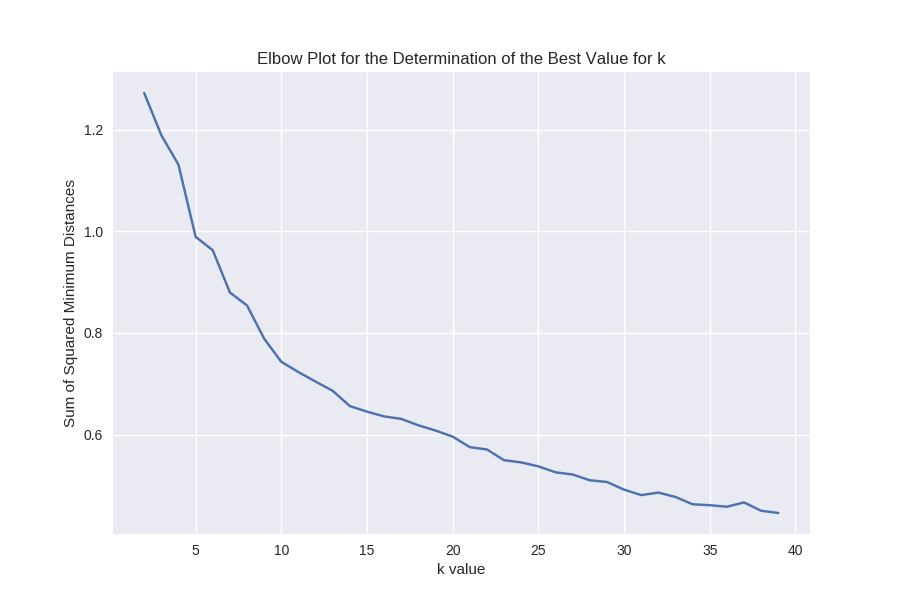

In [18]:
# K-Means Clustering:
# Uses what is called "The Elbow Method" to choose the most optimal value for k:
standardized_df = counties_standardized_df[continuous_variables].copy()
standardized_df_factors = standardized_df.columns.tolist()
errors = []
K = range(2,40)

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=3).fit(standardized_df)
    #kmeans.fit(standardized_df)
    errors.append(np.sum(np.min(cdist(standardized_df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / len(standardized_df))
    
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(K,errors,marker='+')
ax.set_title("Elbow Plot for the Determination of the Best Value for k")
ax.set_xlabel("k value")
ax.set_ylabel("Sum of Squared Minimum Distances")
plt.show()
#somewhere to around 10 to 15 groups seem most optimal as depicted by the elbow method

In [19]:
k = 10 # from the above graph, this seemed to be the among the most preferable values to use for for the  # of groups parameter (k)
standardized_df.shape
# performs the kmeans using a random seed to get the same result every time
kmeans = KMeans(n_clusters=k,random_state=3).fit(standardized_df)
counties_standardized_df["kmeans cluster"] = kmeans.labels_.tolist()
counties_standardized_df

,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,area,kmeans cluster
0,-0.123428,-0.223018,-0.289131,0.197495,"Autauga, Alabama",0
1,-0.098187,-0.004727,-0.289131,0.058961,"Baldwin, Alabama",0
2,-0.249084,-0.488060,-0.289131,-0.443147,"Bibb, Alabama",4
3,-0.129405,0.560981,-0.289131,0.070915,"Blount, Alabama",0
4,0.096383,-0.471465,-0.289131,-0.647864,"Calhoun, Alabama",4
...,...,...,...,...,...,...
2767,-0.310327,-0.284759,-1.186889,-0.054838,"Essex, Vermont",0
2768,-0.236209,-0.499194,-1.186889,1.081742,"Orange, Vermont",5
2769,-0.140110,-0.559834,-1.186889,1.076331,"Washington, Vermont",5
2770,-0.202596,-0.540476,-1.186889,1.254948,"Windsor, Vermont",5


In [32]:
# the following code is used for the purposes of determining the distance of a sample of points from
# every other point within the sample. The euclidean distance metric will be used for this purpose.

# samples 180 data ponits
sample_obs = pd.Series(standardized_df.index).sample(180,random_state=10).values

# contains the standardized sample
standardized_df_sample = standardized_df.iloc[sample_obs]

# prepares the data in order to perform a cartesian product
clustering_analysis_cols = standardized_df_sample.columns
X1 = standardized_df_sample.rename(columns = lambda x: x + "_x")
x1_vector_cols = X1.columns
X1["observation number_x"] = np.arange(0,len(X1)) + 1
X2 = standardized_df_sample.rename(columns = lambda x: x + "_y")
x2_vector_cols = X2.columns
X2["observation number_y"] = np.arange(0,len(X1)) + 1

X1["key"] = 1
X2["key"] = 1

# performs the cartesian product 
pairwise_cartesian_product = X1.merge(X2,left_on="key",right_on="key")
#pairwise_cartesian_product.loc[pairwise_cartesian_product["observation number_x"] != pairwise_cartesian_product["observation number_y"]]

In [31]:
# gets the euclidean distances between each set of points in a data set
def get_euclidean_distances(pairwise_data,x1_cols=x1_vector_cols,x2_cols=x2_vector_cols):
    #np.sqrt(sum((pairwise_data[x1_cols].values - pairwise_data[x2_cols].values) ** 2))
    return euclidean(pairwise_data[x1_cols].values, pairwise_data[x2_cols].values)

# derives the minimum distances of each point to the nearest n points in a data set
def min_distances_to_n(distances,distance_col = "distance",n=20):
    if len(distances) >= n:
        dist = distances[distance_col].sort_values().head(n).max()
    else:
        dist = np.nan
    return dist



<IPython.core.display.Javascript object>


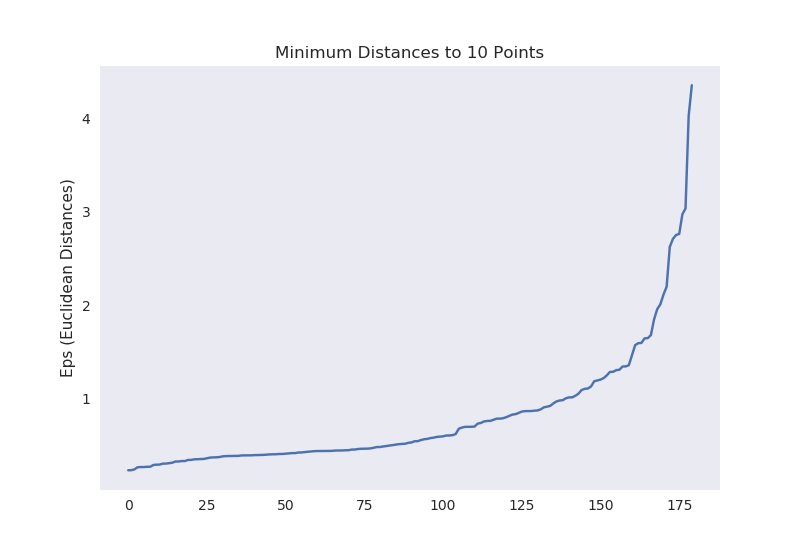

In [33]:
%matplotlib notebook
k=10 # minimum points nearby to be considered as a cluster component
pairwise_cartesian_product["distance"] = pairwise_cartesian_product.apply(get_euclidean_distances, axis = 1)
min_distances = pairwise_cartesian_product.groupby("observation number_x").apply(min_distances_to_n,n=k).sort_values()



# plotting the minimum distance of each observation to "k" points to determine eps
plt.plot(range(0,len(min_distances)),min_distances.values)
plt.title("Minimum Distances to {k} Points".format(k=k))
plt.ylabel("Eps (Euclidean Distances)")
plt.show()



In [37]:
# the above plot suggested that the most preferable value of eps was approximately 1.37. This value of eps
# appeared to cluster noise, however. A different value of eps was chosen as a result through visualization
# of each cluster via principle components analysis as well as trial and error
eps = .41

m = DBSCAN(eps=eps, min_samples=k)
m.fit(standardized_df.values)

counties_standardized_df["DBSCAN clusters"] = m.labels_

def cluster_label(num):
    return "Cluster {}".format(num + 1)

In [38]:
# Determine the minimum amount of components that explain for the majority of the variance between and within clusters
# while simultaneously enabling visualization of the data
pca = PCA(n_components=3)
pca.fit(counties_standardized_df[clustering_analysis_cols])

print("Principle Components Analysis:",'\n')
print("Proportion of Variance Explained by each component:")
print(pca.explained_variance_ratio_)

print("Total Proportion of the Explained Variance:",round(pca.explained_variance_ratio_.sum(),4))

Principle Components Analysis: 

Proportion of Variance Explained by each component:
[0.32852821 0.24245174 0.23524652]
Total Proportion of the Explained Variance: 0.8062


## Visualization of the DBSCAN Clusters 

<IPython.core.display.Javascript object>


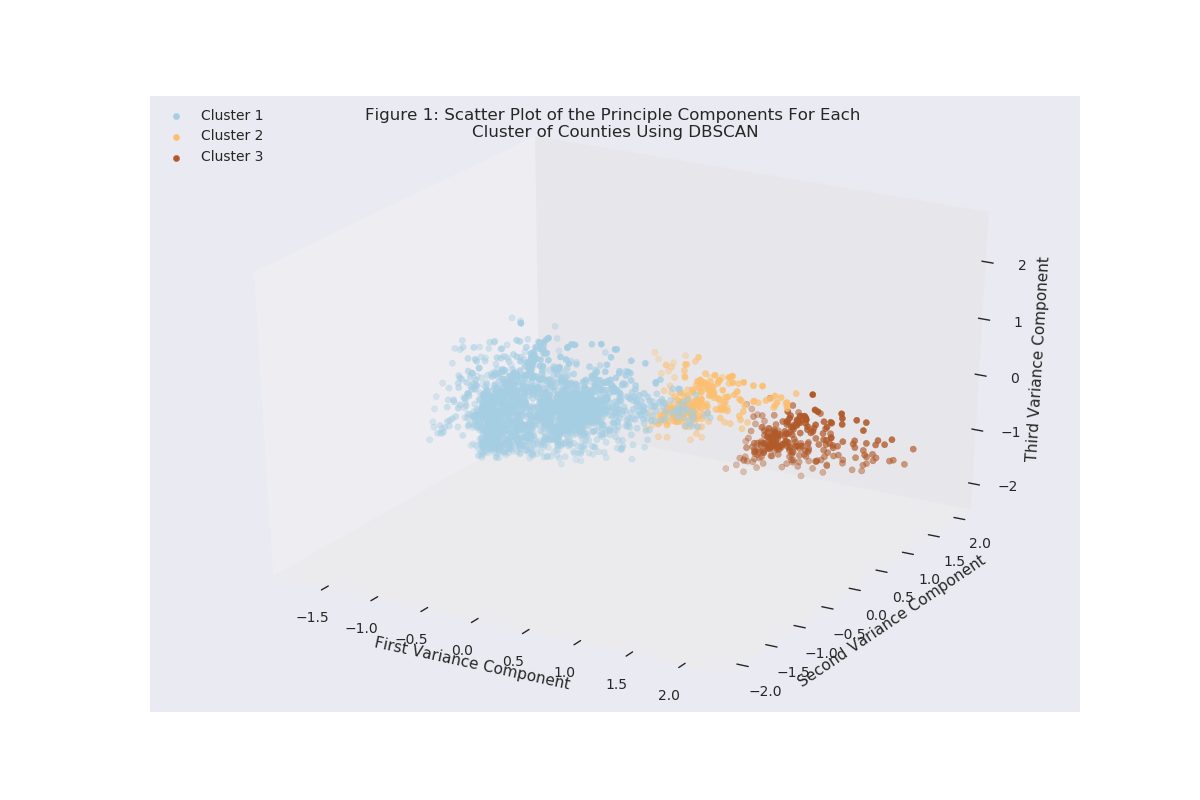

In [39]:
# Using 3 components from the PCA, the variance between and within clusters is visualized:
pca_components = pca.transform(counties_standardized_df[clustering_analysis_cols])[:,:3]


# for customize the appearance of the following scatterplot:
sns.set_style("dark")

# create a 3d interactive scatterplot:
fig,ax=plt.subplots(figsize=(12,8),subplot_kw={'projection': '3d'})

# The following color map will is used in order to quickly identify each cluster from others:
cmap = plt.cm.Paired

# retrieve and sort the unique clusters within each group:
unique_clusters = np.sort(counties_standardized_df["DBSCAN clusters"].unique())
unique_clusters = unique_clusters[unique_clusters != -1]

#clustering_analysis_cols

# create the color map to be used in the following visualizations:
colors = cmap(np.linspace(0,1,unique_clusters.size))
#colors_dict = dict(zip(range(len(colors)),colors))
#ranked_venues_by_nb['Cluster Color'] =  ranked_venues_by_nb.map(colors_dict)
# this is a rotatable graphic

# Each color is zipped with its designated cluster in order to distinguish each cluster from others
for color, cluster in zip(colors,unique_clusters):
    cluster_components = pca_components[counties_standardized_df["DBSCAN clusters"] == cluster]
    ax.scatter(cluster_components[:,0],cluster_components[:,1],
               cluster_components[:,2],
                facecolors=color,
               label = cluster_label(cluster)
              )
    
# cluster_noise = pca_components[counties_standardized_df["DBSCAN clusters"] == -1]
# ax.scatter(cluster_noise[:,0],cluster_noise[:,1],cluster_noise[:,2],c="black",s=1,edgecolor='k',alpha=.2,label="Noise")

ax.legend(loc=2)


    
ax.set_xlabel("First Variance Component")
ax.set_ylabel("Second Variance Component")
ax.set_zlabel("Third Variance Component")
ax.set_title("Figure 1: Scatter Plot of the Principle Components For Each \nCluster of Counties Using DBSCAN")
ax.grid(False)

## PCA Visualization Of DBSCAN Clusters (With Noise)

<IPython.core.display.Javascript object>


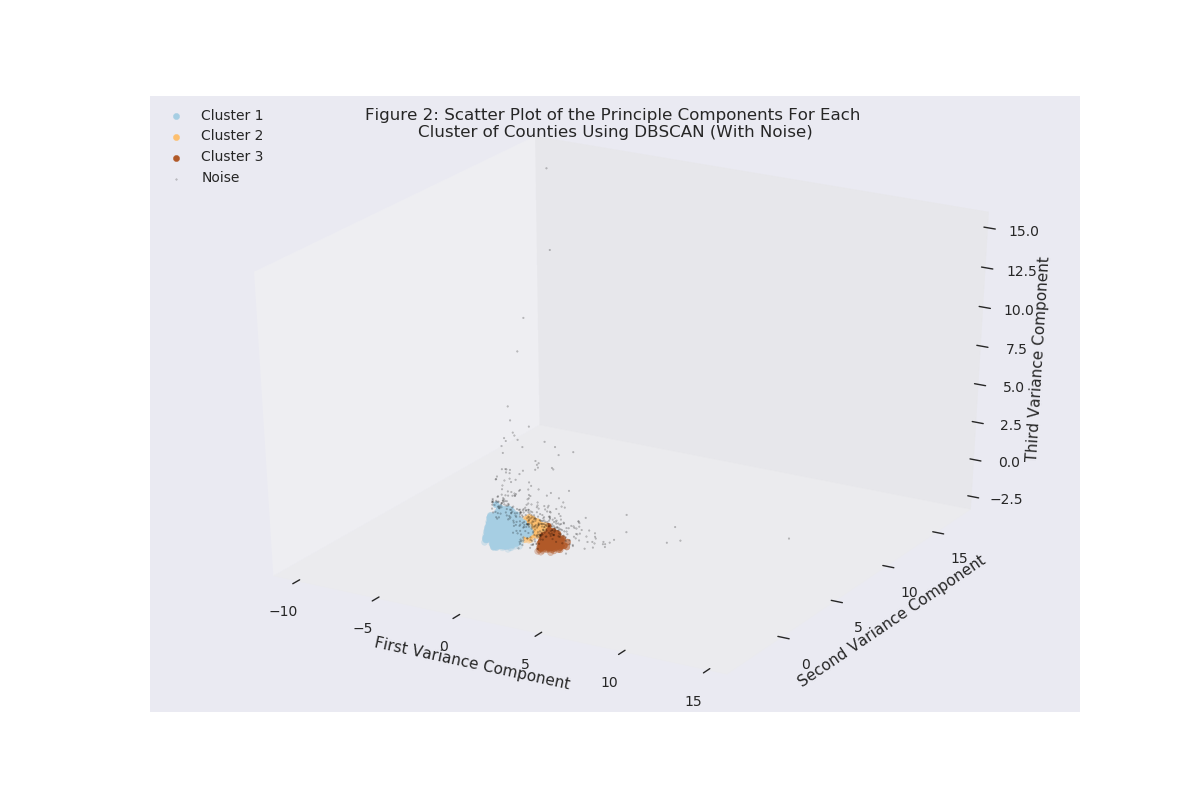

In [40]:

# create a 3d interactive scatterplot:
fig,ax=plt.subplots(figsize=(12,8),subplot_kw={'projection': '3d'})

cmap = plt.cm.Paired

unique_clusters = np.sort(counties_standardized_df["DBSCAN clusters"].unique())
unique_clusters = unique_clusters[unique_clusters != -1]


# create the color map to be used in the following visualizations:
colors = cmap(np.linspace(0,1,unique_clusters.size))

for color, cluster in zip(colors,unique_clusters):
    cluster_components = pca_components[counties_standardized_df["DBSCAN clusters"] == cluster]
    ax.scatter(cluster_components[:,0],cluster_components[:,1],
               cluster_components[:,2],
                facecolors=color,
               label = cluster_label(cluster)
              )
    
cluster_noise = pca_components[counties_standardized_df["DBSCAN clusters"] == -1]
ax.scatter(cluster_noise[:,0],cluster_noise[:,1],cluster_noise[:,2],facecolors="black",s=1.5,edgecolor='k',alpha=.2,label="Noise")

ax.legend(loc=2)


    
ax.set_xlabel("First Variance Component")
ax.set_ylabel("Second Variance Component")
ax.set_zlabel("Third Variance Component")
ax.set_title("Figure 2: Scatter Plot of the Principle Components For Each \nCluster of Counties Using DBSCAN (With Noise)")
ax.grid(False)

## Visualization of The Kmeans Clusters Using Principle Components Analysis

<IPython.core.display.Javascript object>


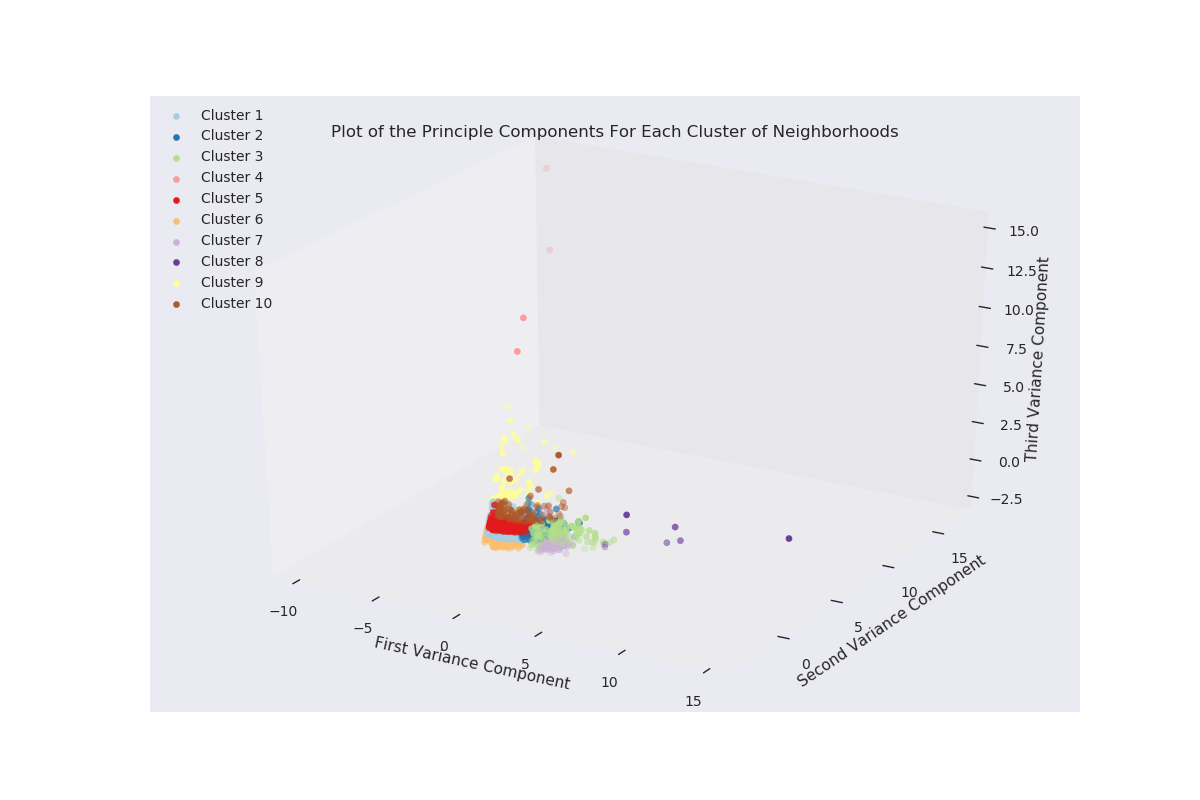

In [41]:
# Using 3 components from the PCA, the variance between and within clusters is visualized:

pca_components = pca.transform(counties_standardized_df[clustering_analysis_cols])[:,:3]

# create a 3d interactive scatterplot:
fig,ax=plt.subplots(figsize=(12,8),subplot_kw={'projection': '3d'})

# The following color map will is used in order to quickly identify each cluster from others:
cmap = plt.cm.Paired

# retrieve and sort the unique clusters within each group:
unique_clusters = np.sort(counties_standardized_df["kmeans cluster"].unique())

#clustering_analysis_cols

# create the color map to be used in the following visualizations:
colors = cmap(np.linspace(0,1,unique_clusters.size))
#colors_dict = dict(zip(range(len(colors)),colors))
#ranked_venues_by_nb['Cluster Color'] =  ranked_venues_by_nb.map(colors_dict)
# this is a rotatable graphic

# Each color is zipped with its designated cluster in order to distinguish each cluster from others
for color, cluster in zip(colors,unique_clusters):
    cluster_components = pca_components[counties_standardized_df["kmeans cluster"] == cluster]
    ax.scatter(cluster_components[:,0],cluster_components[:,1],
               cluster_components[:,2],
                facecolors=color,
               label = cluster_label(cluster)
              )
ax.legend(loc=2)
    
ax.set_xlabel("First Variance Component")
ax.set_ylabel("Second Variance Component")
ax.set_zlabel("Third Variance Component")
ax.set_title("Plot of the Principle Components For Each Cluster of Neighborhoods")
ax.grid(False)

From the above graphs, it seems to be the case that the DBSCAN captures a better picture as to the nature of the data. When visualizing the clusters using principle components analysis, the clusters formed by DBSCAN were distinctly grouped while noise points 

## Understanding The Clusters Formed by the DBSCAN Algorithm

In [43]:
counties_dataset["DBSCAN clusters"] = counties_standardized_df["DBSCAN clusters"]
cluster_frequencies = counties_dataset["DBSCAN clusters"].value_counts()
print(cluster_frequencies.loc[cluster_frequencies.index != -1]
      .sort_index()
      .rename(index=lambda x:"cluster {}:".format(x+1))
      .to_string())
print("unclustered:  ",sum(counties_dataset["DBSCAN clusters"] == -1))

cluster 1:    1886
cluster 2:     229
cluster 3:     252
unclustered:   405


# Cluster 1
### This cluster of counties each appeared to have a modest population density of approximately 81.8 people per square mile on average. With a standard deviation of approximately 105.4, the population density was significantly variable across these counties however. This cluster also appeared to have the lowest county and state crime severity scores averaging 33.7 and 1875.6, respectively when accounting for population density (or persons per square miles). The average employment rate for counties within this cluster was 95.1%. This cluster consisted of a higher percentage of counties (4.3%). that were above the 95th percentile in average income in comparison to other counties, but this difference in the aggregate was negligible compared to those of other clusters. Only 4 (.21%) out of the 1886 counties within this cluster fell below the 5th percentile in income per capita however.

In [322]:
# relevant factors for comparison of the clusters formed
current_relevant_factors = filtered_factors + ["income_lowest_5pct","income_highest_5pct"]

# Cluster 1:
cluster1 = counties_dataset.loc[counties_dataset["DBSCAN clusters"] == 0,current_relevant_factors]
display(cluster1)
display(cluster1.describe()) # generates descriptive statistics

# Proportion of counties below the 5th percentile and above the 95th percentile
print("Proportion of Counties Below the 5th Percentile:")
print(cluster1["income_lowest_5pct"].value_counts(normalize=True).to_string())

print("\nProportion of Counties Above the 95th Percentile:")
print(cluster1["income_highest_5pct"].value_counts(normalize=True).to_string())

,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,income_lowest_5pct,income_highest_5pct
0,91.342786,35.084763,2462.454276,0.952764,False,False
1,102.434589,56.925531,2462.454276,0.950385,False,False
2,36.125440,8.566447,2462.454276,0.941763,False,False
3,88.716577,113.526434,2462.454276,0.950591,False,False
4,187.935455,10.226791,2462.454276,0.938247,False,False
...,...,...,...,...,...,...
2767,9.213326,28.907405,52.101684,0.948431,False,False
2768,41.783312,7.452497,52.101684,0.967949,False,False
2769,84.012539,1.385269,52.101684,0.967856,False,False
2770,56.553847,3.322026,52.101684,0.970924,False,False


,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct
count,1886.000000,1886.000000,1886.000000,1886.000000
mean,81.751037,33.703264,1875.581607,0.951813
std,105.397303,29.751133,959.110575,0.014751
min,0.470017,0.000000,6.523022,0.895947
25%,19.577444,12.824324,1162.958909,0.942795
50%,43.303154,25.634678,1711.872810,0.952953
75%,94.749588,44.758105,2645.545423,0.962893
max,741.242020,199.059640,4579.550985,0.982192


Proportion of Counties Below the 5th Percentile:
False    0.997879
True     0.002121

Proportion of Counties Above the 95th Percentile:
False    0.957052
True     0.042948


# Cluster 2
### This cluster had the highest population density at approximately 100.8 people per square mile on average. Similar to the other two clusters, the average employment rate of these counteis was approximately 94.0%. When comparing the county and state crime severity index after accounting for population density in the area, it can be seen that this cluster had a significantly more crime of greater severity than those observed from cluster 1.  When accounting for population density, areas within this cluster had a mean county crime severity score of approximately 50.4 while having a state crime severity index of approximately 5855.9. While only 2.2% of the areas within this region were above the 95th percentile in income earned, approximately 3.5% of counties fell below the 5th percentile in median income per capita.


In [323]:
# Cluster 2:
cluster2 = counties_dataset.loc[counties_dataset["DBSCAN clusters"] == 1,current_relevant_factors]
display(cluster2)
display(cluster2.describe()) # generates descriptive statistics

# Proportion of counties below the 5th percentile and above the 95th percentile
print("Proportion of Counties Below the 5th Percentile:")
print(cluster2["income_lowest_5pct"].value_counts(normalize=True).to_string())

print("\nProportion of Counties Above the 95th Percentile:")
print(cluster2["income_highest_5pct"].value_counts(normalize=True).to_string())

,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,income_lowest_5pct,income_highest_5pct
244,272.089815,75.104661,5758.852292,0.958061,False,False
245,47.292731,80.551561,5758.852292,0.951652,False,False
246,176.721354,106.974603,5758.852292,0.952259,False,False
247,371.201670,97.985389,5758.852292,0.948876,False,False
249,207.003767,86.906873,5758.852292,0.946900,False,False
...,...,...,...,...,...,...
2730,44.988920,61.280940,5925.904828,0.941019,False,False
2731,22.728401,60.452999,5925.904828,0.915400,False,False
2732,36.085842,70.845514,5925.904828,0.936043,False,False
2733,39.618175,34.885084,5925.904828,0.948302,False,False


,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct
count,229.000000,229.000000,229.000000,229.000000
mean,100.776844,50.447987,5855.904225,0.940085
std,115.089757,35.309906,97.680421,0.010973
min,1.446211,3.292890,5535.382953,0.912188
25%,30.908116,25.303300,5803.951123,0.932351
50%,55.985782,40.245132,5925.904828,0.940889
75%,121.192167,67.812320,5925.904828,0.948656
max,568.536135,169.275934,5925.904828,0.959847


Proportion of Counties Below the 5th Percentile:
False    0.965066
True     0.034934

Proportion of Counties Above the 95th Percentile:
False    0.978166
True     0.021834


# Cluster 3
### This cluster of counties had the lowest population density at approximately 37.5 people per square mile on average. Although this set of counties had the highest employment rate at 95.7, the difference in this circumstance was once again negligible in comparison to the employment rates of counties in the other two clusters. Whilst having the highest rate of employment, it can still be seen that, when compared to those of the other two clusters, these counties had a slightly higher than average county crime severity index of 59.7 on average after taking into account the population size per square mile with a mean. With a very low variability in the state crime severity index of each of these counties, it can be observed that these counties were located in states with the highest weighted state crime severity scores of 9496.47 on average after accounting for state population density. No counties within this cluster below the 5th percentile in income per capita. Although approximately 4.0% of counties within this area were above the 95th percentile in income per capita, the high crime rates and low population density could make the prospect of setting a first class restaurant within these counties less profitable venture as a result.


In [324]:
# Cluster 3:
cluster3 = counties_dataset.loc[counties_dataset["DBSCAN clusters"] == 2,current_relevant_factors]
display(cluster3)
display(cluster3.describe()) # generates descriptive statistics

# Proportion of counties below the 5th percentile and above the 95th percentile
print("Proportion of Counties Below the 5th Percentile:")
print(cluster3["income_lowest_5pct"].value_counts(normalize=True).to_string())

print("\nProportion of Counties Above the 95th Percentile:")
print(cluster3["income_highest_5pct"].value_counts(normalize=True).to_string())

,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,income_lowest_5pct,income_highest_5pct
1286,5.105165,118.447368,9567.223009,0.962386,False,False
1287,30.115288,55.540894,9567.223009,0.960732,False,False
1288,0.695661,107.394332,9567.223009,0.954310,False,False
1289,59.512601,89.941568,9567.223009,0.965276,False,False
1290,1.685006,103.273634,9567.223009,0.967082,False,False
...,...,...,...,...,...,...
2654,3.673529,32.713320,9567.223009,0.958198,False,False
2700,300.685865,23.590500,9482.727837,0.967055,False,False
2701,3.733559,78.280988,9482.727837,0.963704,False,False
2702,1.724414,16.948752,9482.727837,0.963094,False,False


,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct
count,252.000000,252.000000,252.000000,252.000000
mean,37.525818,59.713790,9496.475067,0.957143
std,60.530380,45.933648,31.248409,0.009715
min,0.181269,0.000000,9482.727837,0.928066
25%,3.734020,25.859481,9482.727837,0.951757
50%,15.220185,42.955225,9482.727837,0.958292
75%,43.901344,83.657471,9482.727837,0.963368
max,371.130731,222.062863,9567.223009,0.979676


Proportion of Counties Below the 5th Percentile:
False    1.0

Proportion of Counties Above the 95th Percentile:
False    0.960317
True     0.039683


In [122]:
# For the purposes of this analysis, counties located within cluster 1 seemed to be most conducive 
# for the potential success of a first class restaurant. Specifically, the counties with a relatively high
# income within the area may be most preferable for such a venture.
# It is possible that any of the following states could be suitable candidates for setting up a first-class restaurant.

relevant_factors = ["area"] + factors

# filters by counties above the 95th percentile within cluster 1:
possible_counties_on_income = counties_dataset.loc[(counties_dataset.income_highest_5pct) & (counties_dataset["DBSCAN clusters"] == 0),relevant_factors]
display(possible_counties_on_income)
possible_counties_on_income.shape

,area,crime_severity,state_crime_severity,population_density_est,state_population_density_est,avg_income,popestimate2017,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,avg_fmr_2017
70,"Benton, Arkansas",5334.170000,1.670272e+05,292.646687,58.129020,79719.333333,266300.0,18.227338,2873.387263,0.968135,881.25
138,"El Dorado, California",14949.976667,1.002122e+06,104.518686,234.994799,62502.666667,188987.0,143.036401,4264.442704,0.949387,1281.75
148,"Napa, California",2548.980000,1.002122e+06,179.279633,234.994799,67578.666667,140973.0,14.217901,4264.442704,0.958107,1799.75
150,"Placer, California",13182.486667,1.002122e+06,252.780329,234.994799,61641.000000,386166.0,52.149970,4264.442704,0.955393,1281.75
159,"Santa Barbara, California",13142.183333,1.002122e+06,117.739486,234.994799,57887.333333,448150.0,111.620865,4264.442704,0.950534,1745.75
...,...,...,...,...,...,...,...,...,...,...,...
2629,"Scott, Kansas",372.283333,7.348491e+04,6.948973,37.995741,64383.666667,4961.0,53.573863,1934.030077,0.975426,948.75
2662,"Grafton, New Hampshire",97.003333,9.221367e+02,50.970821,141.366487,57647.000000,89386.0,1.903115,6.523022,0.975694,1073.00
2666,"Putnam, New York",1860.993333,3.137661e+05,403.252792,207.549463,61150.666667,99323.0,4.614955,1511.765176,0.958366,1793.25
2727,"Mineral, Colorado",120.490000,1.524427e+05,0.859843,48.465044,64893.333333,766.0,140.130296,3145.415816,0.974193,750.75


(81, 11)

In [150]:
# When ranking each county across all metrics from 1 to n (lowest metric to highest), it becomes possible
# to determine the relative suitability of each county by

factors_for_consideration = ["popestimate2017",'population_density_est',
                             "crime_severity_by_pop_density",
                             "state_crime_severity_by_pop_density",
                             "employment_pct",'avg_income']

# creates a copy of the data from cluster 0.
counties_factors_dataset = counties_dataset.loc[counties_dataset["DBSCAN clusters"] == 0,:].copy()

# Reverses crime severity such that lower scores denote higher crime severity
counties_factors_dataset[["crime_severity_by_pop_density","state_crime_severity_by_pop_density"]] = counties_factors_dataset[["crime_severity_by_pop_density","state_crime_severity_by_pop_density"]] * -1

# ranks each factor from smallest to largest:
possible_county_percentiles=(counties_factors_dataset[factors_for_consideration]
                            .rank()
                            .merge(counties_factors_dataset[["area"]],left_index=True,right_index=True)
                            )

# converts each variable from a rank of 1 to n into a percentile
possible_county_percentiles[factors_for_consideration] = possible_county_percentiles[factors_for_consideration] / possible_county_percentiles.shape[0]

# produces a rank that is the average of all percentiles from the factors for consideration.
# sorts from largest rank to smallest
possible_county_percentiles['overall_rank'] = possible_county_percentiles[factors_for_consideration].mean(axis=1)
sorted_possible_county_percentiles=(possible_county_percentiles
                                    .sort_values("overall_rank",ascending=False)
                                   )

# narrows down the list to only counties with a high income per capita
high_income_county_percentiles = sorted_possible_county_percentiles.loc[sorted_possible_county_percentiles.area.isin(possible_counties_on_income.area)]
high_income_county_percentiles.head(10)

,popestimate2017,population_density_est,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,avg_income,area,overall_rank
1417,0.979852,0.970308,0.978261,0.998674,0.877519,0.985154,"Rockingham, New Hampshire",0.964961
2300,0.928950,0.927359,0.983033,0.972694,0.969777,0.957582,"Chittenden, Vermont",0.956566
1430,0.897667,0.939024,0.996554,0.977996,0.720042,0.995758,"Hunterdon, New Jersey",0.921174
1423,0.993637,0.992577,0.996554,0.977996,0.518558,0.959173,"Burlington, New Jersey",0.906416
2662,0.841463,0.557264,0.962354,0.998674,0.976140,0.958643,"Grafton, New Hampshire",0.882423
797,0.785260,0.955461,0.879639,0.883881,0.776776,0.958112,"Oldham, Kentucky",0.873188
1089,0.970308,0.997879,0.863733,0.513256,0.878579,0.974019,"Washington, Minnesota",0.866296
1647,0.952280,0.978791,0.699894,0.731177,0.795334,0.986744,"Delaware, Ohio",0.857370
624,0.837222,0.836691,0.842524,0.676564,0.965005,0.973489,"Dallas, Iowa",0.855249
499,0.999470,0.990456,0.737540,0.937434,0.416755,0.993637,"Lake, Illinois",0.845882


In [83]:
coordinate_dataframe = pd.read_csv("Final County Coordinate Data.csv")
coordinate_dataframe

,Area,Latitude,Longitude,Northeast Bound,Southwest Bound,county_radius
0,"Autauga, Alabama",32.508613,-86.667940,"(32.7082131, -86.411172)","(32.307574, -86.9212369)",32723.578039
1,"Baldwin, Alabama",30.731854,-87.710318,"(31.3190171, -87.366591)","(30.1465611, -88.0373089)",72903.258338
2,"Bibb, Alabama",33.040058,-87.150897,"(33.246926, -86.8760228)","(32.83152210000001, -87.421989)",34410.906219
3,"Blount, Alabama",34.013983,-86.636157,"(34.2604829, -86.3034978)","(33.765171, -86.963358)",41098.528186
4,"Calhoun, Alabama",33.763268,-85.839923,"(33.96846, -85.52943210000001)","(33.5559299, -86.146225)",36652.445970
...,...,...,...,...,...,...
2863,"Gilmer, West Virginia",38.913909,-80.832809,"(39.1094009, -80.60579899999999)","(38.717898, -81.05671389999999)",29284.670788
2864,"Pleasants, West Virginia",39.372666,-81.190293,"(39.4764319, -81.00783589999999)","(39.2683278, -81.371478)",19481.976121
2865,"Pocahontas, West Virginia",38.388464,-79.995256,"(38.739811, -79.61787509999999)","(38.03611, -80.3632959)",51019.074061
2866,"Ritchie, West Virginia",39.198974,-81.070768,"(39.38911909999999, -80.80888399999999)","(39.007884, -81.329228)",30919.720626


In [153]:
# limits the coordinate dataframe to counties within the 95th percentile on income 
relevant_coordinate_dataframe=coordinate_dataframe.loc[coordinate_dataframe.Area.isin(high_income_county_percentiles.area),:].copy(deep=True)
display(relevant_coordinate_dataframe.head())
print("Max Radius:",relevant_coordinate_dataframe.county_radius.max())
# each of the following counties has a radius of no more than 110km. As a result, analysis
# will be possible to ascertain the number of businesses and restaurants in the area.
# Using the foursquare api. It can be expected that the number of businesses in an area is correlated
# with the foot traffic within the area. 

,Area,Latitude,Longitude,Northeast Bound,Southwest Bound,county_radius
68,"Benton, Arkansas",34.592322,-92.568262,"(34.6501849, -92.5148201)","(34.534409, -92.621493)",8076.020265
137,"El Dorado, California",38.679684,-120.841905,"(38.6916132, -120.8342878)","(38.6677537, -120.8495181)",1480.852558
147,"Napa, California",38.286012,-122.290051,"(38.3508341, -122.2221959)","(38.221091, -122.357721)",9328.098690
149,"Placer, California",39.018750,-120.746418,"(39.316496, -120.002461)","(38.7115019, -121.4843759)",72563.480937
157,"Santa Barbara, California",34.398713,-119.749952,"(34.4611451, -119.6399201)","(34.336029, -119.859791)",12265.104407


Max Radius: 111261.31023900233


In [229]:
# the following assumes each county has a somewhat square shape to provide an estimate of
# the shops nearby. First, the strings containing coordinates are parsed into tuples.

def parse_string_latlon(latlon, order_to_lonlat=False):
    latlon_str = latlon.replace("(",'').replace(")",'').replace(" ",'')
    lat, lon = latlon_str.split(",")
    
    coords = (float(lat), float(lon)) if not order_to_lonlat else (float(lon), float(lat))
    return coords

def get_northwest_coords(county_data):
    lat = county_data["Northeast Bound"][0]
    lon = county_data["Southwest Bound"][1]
    return lat,lon

def get_southeast_coords(county_data):
    lat = county_data["Southwest Bound"][0]
    lon = county_data["Northeast Bound"][1]
    return lat,lon

# parses each coordinate from a string into a tuple
relevant_coordinate_dataframe["Northeast Bound"]=relevant_coordinate_dataframe["Northeast Bound"].apply(parse_string_latlon)
relevant_coordinate_dataframe["Southwest Bound"]=relevant_coordinate_dataframe["Southwest Bound"].apply(parse_string_latlon)

# imputes the southeast and northwest bounds from the existing bounds
relevant_coordinate_dataframe["Southeast Bound"] = relevant_coordinate_dataframe.apply(get_southeast_coords,axis=1)
relevant_coordinate_dataframe["Northwest Bound"] = relevant_coordinate_dataframe.apply(get_northwest_coords,axis=1)

# Foursquare API:
#### Here, we use the api in order to determine the number of businesses within each of these areas that may be suitable for a first-class restaurant location. The latitude and longitude combined with the county radius will allow for an ease of determination of the amount of businesses and restaurants nearby.

In [156]:
CLIENT_ID = os.environ['fsq_client'] # your Foursquare ID
CLIENT_SECRET = os.environ['fsq_secret'] # your Foursquare Secret
VERSION=datetime.datetime.now().strftime("%Y%m%d") # used to get the most recent data

In [157]:
# displays the total amount of venues within the supplied radius.
def get_nearby_locations(county_data,LIMIT=50):
    lon = county_data["Longitude"]
    lat = county_data["Latitude"]
    radius = county_data["county_radius"] # radius from which to locate counties near the supplied lon and lat
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, radius, LIMIT)
    return requests.get(url).json() # requests and retrieves the desired venue information 
#test=get_nearby_locations(relevant_coordinate_dataframe.iloc[0,:]) # worked

### Finding Venue Information ###
#### The following code was used in order to retrieve a list of venues (restaurant, business, or other attraction) for the purposes of determining the potential suitability of setting up a first class restuarant in such an area. This code was originally ran with a day's interval in between premium requests given that no more than 500 premium requests are allowed per day. A list of possibly beneficial areas was created and saved using the following code:

In [158]:
relevant_coordinate_dataframe["fsq_response"] = relevant_coordinate_dataframe.apply(get_nearby_locations,axis=1)

In [159]:
# prints the code of the response (success, rate exceeded, server error, etc.)
def get_response(response):
        print(response['meta'])

# if the response is not a success, try it again
def retry_response(county_data):
    return get_nearby_locations(county_data) if county_data['fsq_response']['meta']['code'] != 200 else county_data['fsq_response']

relevant_coordinate_dataframe["fsq_response"] = relevant_coordinate_dataframe.apply(retry_response,axis=1)

# displays the number of each kind of code. We want all to be 200 (success).
relevant_coordinate_dataframe['fsq_response'].apply(lambda X: X['meta']['code']).value_counts()

200    78
Name: fsq_response, dtype: int64

In [161]:
# gets the estimated number of nearby venues within the radius of the supplied coordinates
relevant_coordinate_dataframe['total_venues'] = relevant_coordinate_dataframe.fsq_response.apply(lambda info: info['response']['totalResults'])

# merges the total number of venues with the data containing the percentile and sorted score of each location
possible_counties_w_venues = high_income_county_percentiles.merge(relevant_coordinate_dataframe[["Area",'total_venues']],left_on="area",right_on="Area")

# prints out the number of venues for counties with a top 10 overall score 
possible_counties_w_venues.head(10). total_venues.sum()

1266

In [230]:
# the following data displays the number of venues within each area as well as the maximum attainable
# using the api as is. As 50 venues is the maximum attainable, more thorough techniques would be needed
# to retrieve as many venues as possible
for area,response in zip(relevant_coordinate_dataframe.Area.values,relevant_coordinate_dataframe["fsq_response"].values):
    print("Area:",area,"total Results:",response['response']['totalResults'],"\n")
    items_data = response['response']["groups"][0]['items']
    if items_data:
        all_venues = [venue_data['venue'] for venue_data in response['response']["groups"][0]['items']]
        
        print("Maximum Attainable:",len(all_venues),"\n\n\n")

Area: Benton, Arkansas total Results: 93 

Maximum Attainable: 50 



Area: El Dorado, California total Results: 6 

Maximum Attainable: 6 



Area: Napa, California total Results: 139 

Maximum Attainable: 50 



Area: Placer, California total Results: 237 

Maximum Attainable: 50 



Area: Santa Barbara, California total Results: 206 

Maximum Attainable: 50 



Area: Nevada, California total Results: 35 

Maximum Attainable: 35 



Area: Boulder, Colorado total Results: 185 

Maximum Attainable: 50 



Area: Douglas, Colorado total Results: 239 

Maximum Attainable: 50 



Area: Mineral, Colorado total Results: 13 

Maximum Attainable: 13 



Area: Pitkin, Colorado total Results: 1 

Maximum Attainable: 1 



Area: Routt, Colorado total Results: 79 

Maximum Attainable: 50 



Area: Summit, Colorado total Results: 232 

Maximum Attainable: 50 



Area: Blaine, Idaho total Results: 181 

Maximum Attainable: 50 



Area: Lake, Illinois total Results: 240 

Maximum Attainable: 50 



A

In [164]:
# test of reverse geocoding request:
# coordinates -> county name

locator = Nominatim(user_agent='myGeocoder')
coordinates = '53.480837, -2.244914'
location = locator.reverse(coordinates)
location.raw

{'place_id': 96393663,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 37139875,
 'lat': '53.4809597',
 'lon': '-2.2450668274629235',
 'display_name': 'Eagle Insurance Buildings, 68, Cross Street, Chinatown, City Centre, Manchester, Greater Manchester, North West England, England, M2 4JG, United Kingdom',
 'address': {'building': 'Eagle Insurance Buildings',
  'house_number': '68',
  'road': 'Cross Street',
  'neighbourhood': 'Chinatown',
  'suburb': 'City Centre',
  'city': 'Manchester',
  'county': 'Greater Manchester',
  'state_district': 'North West England',
  'state': 'England',
  'postcode': 'M2 4JG',
  'country': 'United Kingdom',
  'country_code': 'gb'},
 'boundingbox': ['53.480856', '53.4810634', '-2.2451761', '-2.2449576']}

In [165]:
# Given that only 50 nearby venues can be gathered from a request, the necessary process is to then 
# make the scan radius of the areas smaller. This requires multiple requests, however along with
# scanning each county in a grid-like manner. the reverse geocoder was used for the purposes of 
# ensuring that the scanned area was still contained within the countie's geography.

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

import pyproj # a function for converting coordinates to cartesian planes and back

G = pyproj.Geod(ellps='WGS84')

# the following function transforms each county into a grid in order to detail the amount of venues
# within a limited location. This is necessary for some counties due to the foursquare api limit
# being at 50 for the amount of returned venues. Within these smaller subsets, the aim is to get
# as much venue data as possible. In order to account for grids that might be out of the bounds
# of a given county, the actual name each county location is reverse geocoded. The reverse geocoded
# name of the county must be the same as the name of the reverse geocoded grid in order to register
# the venue locations within the grid.
def grid_search_venues(county_data,grids=9,LIMIT = 50):
    if county_data["fsq_response"]['response']['totalResults'] > 50 or county_data.county_radius > 100000:
        county_coords = "{}, {}".format(county_data.Latitude,county_data.Longitude)
        location = locator.reverse(county_coords,timeout=10)
        assume_county=0
        try:
            county_name = location.raw['address']['county']
        except KeyError:
            assume_county = 1
        
        sw_lat = county_data["Southwest Bound"][0]
        sw_lon = county_data["Southwest Bound"][1]
        sw_x, sw_y =lonlat_to_xy(sw_lon,sw_lat)
        ne_lat = county_data["Northeast Bound"][0]
        ne_lon = county_data["Northeast Bound"][1]
        ne_x, ne_y =lonlat_to_xy(ne_lon,ne_lat)
        
        line_grids = int(round(np.sqrt(grids))) # grids in a line: rows or columns
        gridshift_end = line_grids + 1
        grid_radius = county_data["county_radius"] / (line_grids - 1) / 1.8
        
        locations = []
        venuetotals = []
        print("Area:",county_data.Area)
        if not assume_county:
            print("Reverse Geocoded Name: ", county_name)
        
        print("Grid Radius:",grid_radius)
        
        for lat_shift in range(1,gridshift_end):
            #weighted avg
            
            
            dx_lat = sw_lat * ((gridshift_end-lat_shift)/gridshift_end) + ne_lat * (lat_shift/gridshift_end)
            for lon_shift in range(1,gridshift_end):
                
                dx_lon = sw_lon * ((gridshift_end-lon_shift)/gridshift_end) + ne_lon * (lon_shift/gridshift_end)
                if lon_shift == 1 and lat_shift == 1:
                    displace_lat = dx_lat
                    displace_lon = dx_lon
                
                #dx_lon, dx_lat = xy_to_lonlat(dx_x,dx_y)
                print("latshift:",lat_shift,"lonshift:",lon_shift,"distance:",
                      G.inv(displace_lon, displace_lat, dx_lon, dx_lat)[2])
                
                current_coords = "{}, {}".format(dx_lat, dx_lon)
                dx_location = locator.reverse(current_coords,timeout=10)

                try:
                    current_county_name = location.raw['address']['county']
                except KeyError:
                    pass
                    
                if assume_county or current_county_name == county_name:
                    
                    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dx_lat, dx_lon, VERSION, grid_radius, LIMIT)
                    response = requests.get(url).json()
                    try:
                        current_total = response['response']['totalResults']
                        venuetotals.append(current_total)
                        print("lat shift:",lat_shift,"lon shift:",lon_shift,"Grid SubTotal:",current_total)
                        if current_total > 0:
                            locations.append(response)
                    except KeyError:
                        print("Key Error: totalResults not found..")
                else:
                    print("County Name", county_name,"!= current county",current_county_name)
        print("total venues:",sum(venuetotals))
        return locations
    else:
        return county_data["fsq_response"]
    
# performs the grid search algorithm to get all venues within the specified radius of each grid:
relevant_coordinate_dataframe["grid_fsq_response"]=relevant_coordinate_dataframe.apply(grid_search_venues,grids=9,axis=1)

Area: Benton, Arkansas
Reverse Geocoded Name:  Saline County
Grid Radius: 2243.338962592865
latshift: 1 lonshift: 1 distance: 0.0
lat shift: 1 lon shift: 1 Grid SubTotal: 42
latshift: 1 lonshift: 2 distance: 2447.3550125920433
lat shift: 1 lon shift: 2 Grid SubTotal: 52
latshift: 1 lonshift: 3 distance: 4894.709982523014
lat shift: 1 lon shift: 3 Grid SubTotal: 6
latshift: 2 lonshift: 1 distance: 3210.838086072256
lat shift: 2 lon shift: 1 Grid SubTotal: 22
latshift: 2 lonshift: 2 distance: 4036.94838844055
lat shift: 2 lon shift: 2 Grid SubTotal: 54
latshift: 2 lonshift: 3 distance: 5853.150015251708
lat shift: 2 lon shift: 3 Grid SubTotal: 56
latshift: 3 lonshift: 1 distance: 6421.691429558931
lat shift: 3 lon shift: 1 Grid SubTotal: 4
latshift: 3 lonshift: 2 distance: 6871.9368002411
lat shift: 3 lon shift: 2 Grid SubTotal: 9
latshift: 3 lonshift: 3 distance: 8073.394495417892
lat shift: 3 lon shift: 3 Grid SubTotal: 49
total venues: 294
Area: Napa, California
Reverse Geocoded Name:

lat shift: 2 lon shift: 2 Grid SubTotal: 5
latshift: 2 lonshift: 3 distance: 89511.89604178187
lat shift: 2 lon shift: 3 Grid SubTotal: 8
latshift: 3 lonshift: 1 distance: 76497.16188438059
lat shift: 3 lon shift: 1 Grid SubTotal: 104
latshift: 3 lonshift: 2 distance: 86486.81002345291
lat shift: 3 lon shift: 2 Grid SubTotal: 88
latshift: 3 lonshift: 3 distance: 111195.18062714761
lat shift: 3 lon shift: 3 Grid SubTotal: 16
total venues: 294
Area: Lake, Illinois
Grid Radius: 14529.032339248008
latshift: 1 lonshift: 1 distance: 0.0
lat shift: 1 lon shift: 1 Grid SubTotal: 237
latshift: 1 lonshift: 2 distance: 24346.904717202437
lat shift: 1 lon shift: 2 Grid SubTotal: 1
latshift: 1 lonshift: 3 distance: 48693.736549587375
lat shift: 1 lon shift: 3 Grid SubTotal: 3
latshift: 2 lonshift: 1 distance: 9614.639808043274
lat shift: 2 lon shift: 1 Grid SubTotal: 231
latshift: 2 lonshift: 2 distance: 26161.089170481362
lat shift: 2 lon shift: 2 Grid SubTotal: 3
latshift: 2 lonshift: 3 distance:

lat shift: 1 lon shift: 1 Grid SubTotal: 17
latshift: 1 lonshift: 2 distance: 2569.546328641589
lat shift: 1 lon shift: 2 Grid SubTotal: 56
latshift: 1 lonshift: 3 distance: 5139.092580470196
lat shift: 1 lon shift: 3 Grid SubTotal: 5
latshift: 2 lonshift: 1 distance: 2277.454611172086
lat shift: 2 lon shift: 1 Grid SubTotal: 21
latshift: 2 lonshift: 2 distance: 3433.2701527205827
lat shift: 2 lon shift: 2 Grid SubTotal: 76
latshift: 2 lonshift: 3 distance: 5620.407143511425
lat shift: 2 lon shift: 3 Grid SubTotal: 12
latshift: 3 lonshift: 1 distance: 4554.917339425902
lat shift: 3 lon shift: 1 Grid SubTotal: 15
latshift: 3 lonshift: 2 distance: 5229.320408637715
lat shift: 3 lon shift: 2 Grid SubTotal: 73
latshift: 3 lonshift: 3 distance: 6865.955945687131
lat shift: 3 lon shift: 3 Grid SubTotal: 5
total venues: 280
Area: Douglas, Nevada
Reverse Geocoded Name:  Douglas County
Grid Radius: 12237.238427738397
latshift: 1 lonshift: 1 distance: 0.0
lat shift: 1 lon shift: 1 Grid SubTotal:

lat shift: 2 lon shift: 3 Grid SubTotal: 6
latshift: 3 lonshift: 1 distance: 38900.42135795646
lat shift: 3 lon shift: 1 Grid SubTotal: 1
latshift: 3 lonshift: 2 distance: 40733.26522166802
lat shift: 3 lon shift: 2 Grid SubTotal: 0
latshift: 3 lonshift: 3 distance: 45793.74015945474
lat shift: 3 lon shift: 3 Grid SubTotal: 1
total venues: 71
Area: Stark, North Dakota
Reverse Geocoded Name:  Stark County
Grid Radius: 13403.63642477422
latshift: 1 lonshift: 1 distance: 0.0
lat shift: 1 lon shift: 1 Grid SubTotal: 0
latshift: 1 lonshift: 2 distance: 21704.619031072845
lat shift: 1 lon shift: 2 Grid SubTotal: 4
latshift: 1 lonshift: 3 distance: 43409.16743120985
lat shift: 1 lon shift: 3 Grid SubTotal: 2
latshift: 2 lonshift: 1 distance: 10588.738719858828
lat shift: 2 lon shift: 1 Grid SubTotal: 16
latshift: 2 lonshift: 2 distance: 24132.5975857404
lat shift: 2 lon shift: 2 Grid SubTotal: 64
latshift: 2 lonshift: 3 distance: 44644.806764696434
lat shift: 2 lon shift: 3 Grid SubTotal: 6
l

lat shift: 1 lon shift: 2 Grid SubTotal: 16
latshift: 1 lonshift: 3 distance: 27768.40512694436
lat shift: 1 lon shift: 3 Grid SubTotal: 31
latshift: 2 lonshift: 1 distance: 15407.960910884087
lat shift: 2 lon shift: 1 Grid SubTotal: 32
latshift: 2 lonshift: 2 distance: 20731.968903497684
lat shift: 2 lon shift: 2 Grid SubTotal: 152
latshift: 2 lonshift: 3 distance: 31733.92205228138
lat shift: 2 lon shift: 3 Grid SubTotal: 98
latshift: 3 lonshift: 1 distance: 30816.286473399956
lat shift: 3 lon shift: 1 Grid SubTotal: 36
latshift: 3 lonshift: 2 distance: 33788.904748069705
lat shift: 3 lon shift: 2 Grid SubTotal: 120
latshift: 3 lonshift: 3 distance: 41446.70370779642
lat shift: 3 lon shift: 3 Grid SubTotal: 61
total venues: 557
Area: Clarke, Virginia
Reverse Geocoded Name:  Clarke County
Grid Radius: 5877.220847068274
latshift: 1 lonshift: 1 distance: 0.0
lat shift: 1 lon shift: 1 Grid SubTotal: 15
latshift: 1 lonshift: 2 distance: 7007.917273077285
lat shift: 1 lon shift: 2 Grid Sub

lat shift: 3 lon shift: 2 Grid SubTotal: 0
latshift: 3 lonshift: 3 distance: 67434.27631712647
lat shift: 3 lon shift: 3 Grid SubTotal: 0
total venues: 166
Area: San Miguel, Colorado
Reverse Geocoded Name:  San Miguel County
Grid Radius: 17070.7819344125
latshift: 1 lonshift: 1 distance: 0.0
lat shift: 1 lon shift: 1 Grid SubTotal: 1
latshift: 1 lonshift: 2 distance: 28823.593558228004
lat shift: 1 lon shift: 2 Grid SubTotal: 1
latshift: 1 lonshift: 3 distance: 57647.09835477864
lat shift: 1 lon shift: 3 Grid SubTotal: 5
latshift: 2 lonshift: 1 distance: 10583.44961778447
lat shift: 2 lon shift: 1 Grid SubTotal: 1
latshift: 2 lonshift: 2 distance: 30687.742671179054
lat shift: 2 lon shift: 2 Grid SubTotal: 1
latshift: 2 lonshift: 3 distance: 58573.98519113196
lat shift: 2 lon shift: 3 Grid SubTotal: 12
latshift: 3 lonshift: 1 distance: 21167.071225838627
lat shift: 3 lon shift: 1 Grid SubTotal: 0
latshift: 3 lonshift: 2 distance: 35730.94040994082
lat shift: 3 lon shift: 2 Grid SubTota

In [166]:
# gets each unique venue by registering only unique ID's and the information associated with each.
def get_unique_venues(county_data):
    if county_data["fsq_response"]['response']['totalResults'] > 50:
        #items_data = response['response']["groups"][0]['items']
        venue_id_list = set()
        all_venues = [venue_data for venue_data in county_data["fsq_response"]['response']["groups"][0]['items']]
        venue_id_list.update([venue_data["venue"]["id"] for venue_data in all_venues])
        venue_id_list = list(venue_id_list)
        all_other_venues_dict = {venue_data["venue"]["id"]:venue_data for response_data in county_data["grid_fsq_response"]
                            for venue_data in response_data['response']["groups"][0]['items']
                            if venue_data["venue"]["id"] not in venue_id_list}
        for id_num, response_data in all_other_venues_dict.items():
            if id_num not in venue_id_list:
                venue_id_list.append(id_num)
                all_venues.append(response_data)
                
        return all_venues
    else:
        return county_data['fsq_response']
        
# utilizes the "get_unique_venues" algorithm:
relevant_coordinate_dataframe['combined_fsq_response']=relevant_coordinate_dataframe.apply(get_unique_venues,axis=1)
relevant_coordinate_dataframe[['combined_fsq_response',"Area"]]

,combined_fsq_response,Area
68,"[{'reasons': {'count': 0, 'items': [{'summary'...","Benton, Arkansas"
137,"{'meta': {'code': 200, 'requestId': '5ecc7829b...","El Dorado, California"
147,"[{'reasons': {'count': 0, 'items': [{'summary'...","Napa, California"
149,"[{'reasons': {'count': 0, 'items': [{'summary'...","Placer, California"
157,"[{'reasons': {'count': 0, 'items': [{'summary'...","Santa Barbara, California"
...,...,...
2795,"{'meta': {'code': 200, 'requestId': '5ecc7872d...","Chittenden, Vermont"
2798,"{'meta': {'code': 200, 'requestId': '5ecc78891...","Goochland, Virginia"
2828,"[{'reasons': {'count': 0, 'items': [{'summary'...","San Miguel, Colorado"
2838,"{'meta': {'code': 200, 'requestId': '5ecc79ad5...","Mitchell, Iowa"


In [169]:

# takes the information derived from the foursquare api and transforms it into a neat data set with 
# the following columns:          Area, name, id, restaurant
def prettify_venue_data(county_data):
    area = county_data.Area
    names = []
    id_numbers = []
    categories = []
    locations = []
    if isinstance(county_data['combined_fsq_response'],(list,tuple)):
        for venue in county_data['combined_fsq_response']:
            name=venue["venue"]["name"]
            names.append(name)
            category = "{}".format(venue["venue"]["categories"][0]['icon'])
            categories.append(category)
            id_number = venue["venue"]["id"]
            id_numbers.append(id_number)
            location = venue["venue"]['location']['lat'], venue["venue"]['location']['lng']
            locations.append(location)
        category_df = pd.DataFrame({"Area":area,"name":names,"id":id_numbers,"category":categories,'location':locations})
    else:
        venues=county_data['combined_fsq_response']['response']["groups"][0]['items']
        if len(venues) > 0:
            for venue in venues:
                name=venue["venue"]["name"]
                id_number = venue["venue"]["id"]
                category = "{}".format(venue["venue"]["categories"][0]['icon'])
                names.append(name)
                id_numbers.append(id_number)
                categories.append(category)
                location = venue["venue"]['location']['lat'], venue["venue"]['location']['lng']
                locations.append(location)
            category_df = pd.DataFrame({"Area":area,"name":names,"id":id_numbers,"category":categories,'location':locations})
        else:
            category_df = pd.DataFrame({"Area":area,"name":[],"id":[],"category":[],'location':[]})
    return category_df

# performs the function to generate a dataframe with the using each row iteratively
categories_list = []
for row,data in relevant_coordinate_dataframe.iterrows():
    categories_list.append(prettify_venue_data(data))
categories_df = pd.concat(categories_list)
categories_df["restaurant"] = categories_df.category.str.contains('food')
display(categories_df[["Area","name","id","restaurant"]].head())

# saves the resulting data frame:
categories_df.to_csv("/home/sbr0/Dropbox/Analysis Planning/coursera stuffs/Capstone/First-Class Restaurant Location Analysis/data sets/Current Restaurant Information - All Potential Counties.csv",index=False)

,Area,name,id,restaurant
0,"Benton, Arkansas",Kum & Go,5387707a498e6b48ca80b9db,False
1,"Benton, Arkansas",Buffet City,4b81d6e0f964a520aac030e3,True
2,"Benton, Arkansas",Kroger,4bb8caf198c7ef3bcf683102,True
3,"Benton, Arkansas",The Home Depot,4b79958cf964a52055032fe3,False
4,"Benton, Arkansas",Eat My Catfish,4d1cca112fa36a31732df83d,True


In [172]:
# reads the result of a request as a dictionary for use:
def string_to_json(json_str):
    if pd.notnull(json_str):
        return ast.literal_eval(json_str)
    else:
        np.nan

try:
    # the existing data set is a subset of possible counties from which to set up a first-class restaurant:
    import ast
    # reads in a copy of the final data set containing venue ratings, highly rated restaurants, etc.
    categories_df = pd.read_csv("/home/sbr0/Dropbox/Analysis Planning/coursera stuffs/Capstone/First-Class Restaurant Location Analysis/data sets/Current Restaurant Information.csv")
    categories_df["final_combined_ratings_info"]=categories_df.final_combined_ratings_info.apply(string_to_json)
    categories_df["ratings_info"] = categories_df["ratings_info"].apply(string_to_json)
    categories_df["ratings_info2"] = categories_df["ratings_info2"].apply(string_to_json)
    all_relevant_areas = relevant_coordinate_dataframe["Area"].unique()
    assert np.isin(categories_df.Area.unique(),all_relevant_areas).all(), "At least one previously research county is not contained in the new data set"
    print("Sample of high-income counties in Cluster 1:\n","\n ".join(categories_df.Area.unique().tolist()))
    
except:
    print("No Previous Categories DF with All Prexisting Areas Found in New Dataset")

Sample of high-income counties in Cluster 1:
 Lake, Illinois
 Dallas, Iowa
 Oldham, Kentucky
 Washington, Minnesota
 Rockingham, New Hampshire
 Grafton, New Hampshire
 Burlington, New Jersey
 Hunterdon, New Jersey
 Delaware, Ohio
 Chittenden, Vermont


In [176]:
# Reads the total amount of restaurants and venues of any type across the top 10 counties.
top_counties_categories_df = categories_df.loc[categories_df.Area.isin(possible_counties_w_venues.head(10).area)].copy(deep=True)
print("Total Restaurants:",top_counties_categories_df.restaurant.sum())
print("Total Venues:",top_counties_categories_df.shape[0])

Total Restaurants: 917
Total Venues: 1617


In [177]:
# returns ratings (premium api call)
def get_restaurant_ratings(venue_data):
    if venue_data.restaurant:
        venue_id = venue_data["id"] # ID of a restaurant
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
        try:
            response = requests.get(url).json()
            return response
        except:
            return np.nan
        
# returns the code (the code specifies whether or not the request was successful)        
def get_code(venue_data):
    try:
        code = venue_data['meta']["code"]
        return code
    except:
        return 0
    
# for restaurants in which the retrieval was not successful, this algorithm repeats the process
def get_missing_restaurant_ratings(venue_data,code_var = "code"):
    if venue_data[code_var] != 200 and venue_data.restaurant:
        venue_id = venue_data["id"] # ID of a restaurant
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
        try:
            response = requests.get(url).json()
            return response
        except:
            return np.nan
    
# if the final data set is not already read in, this algorithm obtains premium venue information 
if not "final_combined_ratings_info" in top_counties_categories_df.columns:
    top_counties_categories_df["ratings_info"] = top_counties_categories_df.apply(get_restaurant_ratings,axis=1)

In [178]:
# first iteration (200 = success, 429 = rate exceeded, 0 = not applicable (non-restaurant))
top_counties_categories_df["code"] = top_counties_categories_df.ratings_info.apply(get_code)
top_counties_categories_df.code.value_counts()

0      700
200    499
429    418
Name: code, dtype: int64

In [179]:
# ran after the fsq api calls reset period:
if not "final_combined_ratings_info" in top_counties_categories_df.columns:
    top_counties_categories_df["ratings_info2"] = top_counties_categories_df.apply(get_missing_restaurant_ratings,axis=1)

In [180]:
# combines all successful restaurant requests into one final variable:
def combine_restaurant_data(venue_data):
    ratings_data = venue_data["ratings_info"] if venue_data['code'] == 200 else venue_data["ratings_info2"]
    return ratings_data

top_counties_categories_df["final_combined_ratings_info"]=top_counties_categories_df.apply(combine_restaurant_data,axis=1)


In [181]:
top_counties_categories_df["code2"]=top_counties_categories_df["final_combined_ratings_info"].apply(get_code)
top_counties_categories_df['final_code'] = [code2 if code1 != 200 else code1 for (code1,code2)
                                            in zip(top_counties_categories_df.code,
                                                   top_counties_categories_df.code2)]

# indicates whether requests were successful or not. 
# 0 denotes a lack of a request (because business ratings were not sought) :
display(top_counties_categories_df["final_code"].value_counts())

200    917
0      700
Name: final_code, dtype: int64

In [ ]:
def get_rating(venue_data):
    if venue_data["final_code"] == 200:
        try:          
            return venue_data.final_combined_ratings_info["response"]["venue"]['rating']
        except KeyError:
            return np.nan
        
    return np.nan

def get_likes(venue_data):
    if venue_data["final_code"] == 200:
        return venue_data.final_combined_ratings_info["response"]["venue"]['likes']['count']        
    else:
        return np.nan

# gets the rating for restaurants with ratings
top_counties_categories_df["rating"] = top_counties_categories_df.apply(get_rating,axis=1)
# indicates whether the restaurant is rated or not
top_counties_categories_df["is_rated"]=(~pd.isnull(top_counties_categories_df.rating))

# indicates the number of likes a restaurant has
top_counties_categories_df["likes"] = top_counties_categories_df.apply(get_likes,axis=1)

In [183]:
# out of those venues, the total number of rated venues:
print("Restaurant is Rated:")
venue_info_df = top_counties_categories_df.loc[top_counties_categories_df["final_code"] == 200,:].copy()
venue_info_df["is_rated"].value_counts()

Restaurant is Rated:


True     876
False     41
Name: is_rated, dtype: int64

In [184]:
# number of rated restaurants by Area 
pd.options.display.max_rows = 50
display(venue_info_df.groupby("Area")["is_rated"].value_counts().to_frame())
pd.options.display.max_rows = 10

is_rated
Area                      is_rated          
Burlington, New Jersey    True            38
                          False           10
Chittenden, Vermont       False            5
                          True             4
Dallas, Iowa              False            1
Delaware, Ohio            True            58
                          False            1
Grafton, New Hampshire    False            1
Hunterdon, New Jersey     True           202
                          False            4
Lake, Illinois            True           109
                          False            3
Oldham, Kentucky          True            94
                          False            7
Rockingham, New Hampshire True           236
                          False            2
Washington, Minnesota     True           135
                          False            7

In [185]:
# for areas with ratings, this function indicates the statistics relating to restaurant ratings within the area.
venue_info_df.groupby("Area")["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
"Burlington, New Jersey",38.0,7.413158,0.975697,5.6,6.700,7.70,8.100,9.1
"Chittenden, Vermont",4.0,7.700000,1.151810,6.4,7.225,7.60,8.075,9.2
"Dallas, Iowa",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Delaware, Ohio",58.0,7.084483,0.792908,5.6,6.425,6.95,7.600,8.8
"Grafton, New Hampshire",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Hunterdon, New Jersey",202.0,7.749010,0.668647,5.8,7.400,7.75,8.200,9.2
"Lake, Illinois",109.0,8.631193,0.459810,7.7,8.300,8.60,9.100,9.4
"Oldham, Kentucky",94.0,7.628723,0.971156,5.5,6.925,7.80,8.400,9.1
"Rockingham, New Hampshire",236.0,8.186864,0.644417,5.7,7.900,8.30,8.600,9.3


In [186]:
# for areas with likes, this function indicates the statistics relating to restaurant likes within the area.
print("Likes by Venue")
display(venue_info_df.groupby("is_rated")["likes"].describe())
venue_info_df.corr()

Likes by Venue


,count,mean,std,min,25%,50%,75%,max
is_rated,,,,,,,,
False,41.0,1.878049,1.615474,0.0,0.0,2.0,3.00,5.0
True,876.0,36.285388,52.669174,0.0,10.0,20.0,41.25,536.0


,restaurant,code,code2,final_code,is_rated,likes,rating
restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
code,NaN,1.000000,NaN,NaN,-0.045671,-0.202658,-0.340762
code2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_rated,NaN,-0.045671,NaN,NaN,1.000000,0.136909,NaN
likes,NaN,-0.202658,NaN,NaN,0.136909,1.000000,0.436439
rating,NaN,-0.340762,NaN,NaN,NaN,0.436439,1.000000


In [187]:
# to be used for imputing missing ratings from the number of likes within the area
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [188]:
venue_info_df = venue_info_df.reset_index(drop=True)
area_indicators = pd.get_dummies(venue_info_df["Area"]) # indicator variables specifying the current county

In [189]:
# imputing rating by area and likes:
venues_imputation_df = venue_info_df[["rating","likes"]].merge(area_indicators,left_index=True,right_index=True)

bayesian_ridge_imputer = IterativeImputer()
imputed_rating_matrix = bayesian_ridge_imputer.fit_transform(venues_imputation_df)
imputed_rating_df = pd.DataFrame(imputed_rating_matrix,columns=venues_imputation_df.columns)
venue_info_df['imputed_rating'] = imputed_rating_df.rating

def get_imputed_ratings(venue_rating):
    final_rating = venue_rating["imputed_rating"] if  pd.isnull(venue_rating["rating"]) else venue_rating["rating"]
    return final_rating
venue_info_df["rating (with imputation)"] = venue_info_df.apply(get_imputed_ratings,axis=1)

In [191]:
# describes the observed ratings, imputed ratings, and the combined observed and imputed data

venue_info_by_area_df = venue_info_df.groupby(["Area"])[["rating","imputed_rating","rating (with imputation)"]].describe()

print("Observed Ratings")
display(venue_info_by_area_df['rating'])
print("Imputed Ratings")
display(venue_info_by_area_df['imputed_rating'])
print("Observed and Imputed Ratings")
display(venue_info_by_area_df["rating (with imputation)"])


Observed Ratings


,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
"Burlington, New Jersey",38.0,7.413158,0.975697,5.6,6.700,7.70,8.100,9.1
"Chittenden, Vermont",4.0,7.700000,1.151810,6.4,7.225,7.60,8.075,9.2
"Dallas, Iowa",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Delaware, Ohio",58.0,7.084483,0.792908,5.6,6.425,6.95,7.600,8.8
"Grafton, New Hampshire",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Hunterdon, New Jersey",202.0,7.749010,0.668647,5.8,7.400,7.75,8.200,9.2
"Lake, Illinois",109.0,8.631193,0.459810,7.7,8.300,8.60,9.100,9.4
"Oldham, Kentucky",94.0,7.628723,0.971156,5.5,6.925,7.80,8.400,9.1
"Rockingham, New Hampshire",236.0,8.186864,0.644417,5.7,7.900,8.30,8.600,9.3


Imputed Ratings


,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
"Burlington, New Jersey",48.0,7.406493,0.865805,5.600000,7.075000,7.387684,7.925000,9.100000
"Chittenden, Vermont",9.0,7.644472,0.707323,6.400000,7.590021,7.600050,7.610078,9.200000
"Dallas, Iowa",1.0,7.668507,NaN,7.668507,7.668507,7.668507,7.668507,7.668507
"Delaware, Ohio",59.0,7.084031,0.786050,5.600000,6.450000,7.000000,7.600000,8.800000
"Grafton, New Hampshire",1.0,7.683550,NaN,7.683550,7.683550,7.683550,7.683550,7.683550
"Hunterdon, New Jersey",206.0,7.746793,0.662280,5.800000,7.400000,7.700000,8.200000,9.200000
"Lake, Illinois",112.0,8.619344,0.459193,7.700000,8.275000,8.600000,9.025000,9.400000
"Oldham, Kentucky",101.0,7.619407,0.937179,5.500000,7.000000,7.800000,8.400000,9.100000
"Rockingham, New Hampshire",238.0,8.185436,0.641882,5.700000,7.900000,8.300000,8.600000,9.300000


Observed and Imputed Ratings


,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
"Burlington, New Jersey",48.0,7.406493,0.865805,5.600000,7.075000,7.387684,7.925000,9.100000
"Chittenden, Vermont",9.0,7.644472,0.707323,6.400000,7.590021,7.600050,7.610078,9.200000
"Dallas, Iowa",1.0,7.668507,NaN,7.668507,7.668507,7.668507,7.668507,7.668507
"Delaware, Ohio",59.0,7.084031,0.786050,5.600000,6.450000,7.000000,7.600000,8.800000
"Grafton, New Hampshire",1.0,7.683550,NaN,7.683550,7.683550,7.683550,7.683550,7.683550
"Hunterdon, New Jersey",206.0,7.746793,0.662280,5.800000,7.400000,7.700000,8.200000,9.200000
"Lake, Illinois",112.0,8.619344,0.459193,7.700000,8.275000,8.600000,9.025000,9.400000
"Oldham, Kentucky",101.0,7.619407,0.937179,5.500000,7.000000,7.800000,8.400000,9.100000
"Rockingham, New Hampshire",238.0,8.185436,0.641882,5.700000,7.900000,8.300000,8.600000,9.300000


In [192]:
# displays the number of duplicate id's to verify data integrity
print("Total Duplicate ID's - ratings with imputation data set",
      (venue_info_df['id'].value_counts().values > 2).sum())
print("Total Duplicate ID's - original data set",
      (top_counties_categories_df['id'].value_counts().values > 2).sum())

Total Duplicate ID's - ratings with imputation data set 0
Total Duplicate ID's - original data set 0


In [197]:
# merges the resulting data while taking care not to create duplicate columns

categories_cols = [col for col in top_counties_categories_df if col not in ["rating","likes","location"]]
top_counties_categories_final_df = top_counties_categories_df[categories_cols].merge(venue_info_df[['id',"likes","rating (with imputation)"]],left_on="id",right_on="id",how='outer').rename(columns={'rating (with imputation)':'rating'})
top_counties_categories_final_df=top_counties_categories_final_df.merge(categories_df[['id','location']],left_on='id',right_on='id')

In [198]:
top_counties_categories_final_df.head()

,Area,name,id,category,restaurant,ratings_info,code,ratings_info2,final_combined_ratings_info,code2,final_code,is_rated,likes,rating,location
0,"Lake, Illinois",Target,559cff47498ea252d4fb90b9,{'prefix': 'https://ss3.4sqi.net/img/categorie...,False,None,0,None,None,0,0,False,NaN,NaN,"(42.2791227, -87.8737855)"
1,"Lake, Illinois",Chicago Botanic Garden,4a4fa2f5f964a52083af1fe3,{'prefix': 'https://ss3.4sqi.net/img/categorie...,False,None,0,None,None,0,0,False,NaN,NaN,"(42.148641727785865, -87.78943061828613)"
2,"Lake, Illinois",Gillson Beach,4c267995136d20a1b56fe561,{'prefix': 'https://ss3.4sqi.net/img/categorie...,False,None,0,None,None,0,0,False,NaN,NaN,"(42.079131420478724, -87.6857016844131)"
3,"Lake, Illinois",Portillo's,56422291498e79d44bef4e58,{'prefix': 'https://ss3.4sqi.net/img/categorie...,True,"{'meta': {'code': 200, 'requestId': '5ec86afec...",200,None,"{'meta': {'code': 200, 'requestId': '5ec86afec...",200,200,True,144.0,9.3,"(42.3912172, -87.9542927)"
4,"Lake, Illinois",Independence Grove Forest Preserve,4b51ecf5f964a520a35b27e3,{'prefix': 'https://ss3.4sqi.net/img/categorie...,False,None,0,None,None,0,0,False,NaN,NaN,"(42.30695905916094, -87.95242309570312)"


In [199]:
# saves the resulting final data set for future use
top_counties_categories_final_df.to_csv("Current Restaurant Information.csv",index=False)

In [200]:
def venue_latlon(venue_data):
    return eval(str(venue_data['location']))

# reads the latitude and longitude of the county from a string into a tuple
top_counties_categories_final_df['latlon'] = top_counties_categories_final_df.apply(venue_latlon,axis=1)

In [217]:
# shows the number of highly rated venues in a given area
venues_by_group.rating.apply(lambda x: sum(x >= 9))

Area
Burlington, New Jersey        1
Chittenden, Vermont           1
Dallas, Iowa                  0
Delaware, Ohio                0
Grafton, New Hampshire        0
Hunterdon, New Jersey         3
Lake, Illinois               39
Oldham, Kentucky              4
Rockingham, New Hampshire    22
Washington, Minnesota        11
Name: rating, dtype: int64

In [278]:
# the following combines the number of restaurants, venues, average likes, and average ratings for each area  
total_restaurants_by_area = top_counties_categories_final_df.loc[top_counties_categories_final_df.restaurant,"Area"].value_counts()
total_restaurants_by_area=total_restaurants_by_area.rename("Total Restaurants")
total_venues_by_area = top_counties_categories_final_df.Area.value_counts()
total_venues_by_area = total_venues_by_area.rename("Total Venues")
totals_by_area = pd.merge(total_restaurants_by_area,total_venues_by_area,left_index=True,right_index=True)

venues_by_group = top_counties_categories_final_df.groupby("Area")
avg_restaurant_rating_by_area = venues_by_group["rating"].mean()
avg_restaurant_rating_by_area = avg_restaurant_rating_by_area.rename("Average Restaurant Rating")

avg_restaurant_likes_by_area = venues_by_group["likes"].mean()
avg_restaurant_likes_by_area = avg_restaurant_likes_by_area.rename("Average Restaurant Likes")

total_high_rated_venues = venues_by_group.rating.apply(lambda x: sum(x >= 9)).rename("Total Highly Rated Restaurants")

# combines the averages and totals that were previously calculated
stats_by_area = pd.merge(totals_by_area,total_high_rated_venues,left_index=True,right_index=True)
stats_by_area = pd.merge(stats_by_area,avg_restaurant_rating_by_area,left_index=True,right_index=True)
stats_by_area = pd.merge(stats_by_area,avg_restaurant_likes_by_area,left_index=True,right_index=True)

# displays the resulting data set with a caption
display(stats_by_area.style.set_caption("Total Number of Restaurants and other Venues in each County"))


top_counties = top_counties_categories_final_df.Area.unique().tolist()

# combines the location coordinates with the information on a variety of metrics
relevant_counties_df = (possible_counties_on_income
                        .merge(relevant_coordinate_dataframe[["Area","Longitude","Latitude",'county_radius']],
                               left_on="area",right_on="Area")
                        .query("Area in @top_counties")
                        .drop("Area",axis=1)
                        #.merge(stats_by_area,left_on="area",right_index=True)
                        .merge(high_income_county_percentiles[['area','overall_rank']],left_on="area",right_on="area")
                        .sort_values(by="overall_rank",ascending=False)
                       )

# displays the combined data:
relevant_counties_df.style.set_caption("Geographic and Sociographic Factors for Potentially Suitable Counties")

,Total Restaurants,Total Venues,Total Highly Rated Restaurants,Average Restaurant Rating,Average Restaurant Likes
"Rockingham, New Hampshire",238,371,22,8.18544,35.2227
"Hunterdon, New Jersey",206,309,3,7.74679,23.9369
"Washington, Minnesota",142,282,11,8.18496,34.7324
"Lake, Illinois",112,172,39,8.61934,82.9732
"Oldham, Kentucky",101,192,4,7.61941,27.1584
"Delaware, Ohio",59,137,0,7.08403,14.6949
"Burlington, New Jersey",48,103,1,7.40649,11.5417
"Chittenden, Vermont",9,42,1,7.64447,17.2222
"Grafton, New Hampshire",1,5,0,7.68355,4
"Dallas, Iowa",1,4,0,7.66851,1


,area,crime_severity,state_crime_severity,population_density_est,state_population_density_est,avg_income,popestimate2017,crime_severity_by_pop_density,state_crime_severity_by_pop_density,employment_pct,avg_fmr_2017,Longitude,Latitude,county_radius,overall_rank
4,"Rockingham, New Hampshire",162.887,922.137,382.522,141.366,67687,306363,0.425823,6.52302,0.968298,1342.93,-71.0173,43.0069,46650.8,0.964961
8,"Chittenden, Vermont",55.15,3379.88,260.996,64.8708,57592,162372,0.211306,52.1017,0.974951,1334.75,-72.9203,43.7618,13254.5,0.956566
6,"Hunterdon, New Jersey",0,31506.7,286.414,1029.67,83532.3,125059,0,30.599,0.961491,1842.25,-74.9508,40.5637,32571,0.921174
5,"Burlington, New Jersey",0,31506.7,547.173,1029.67,57716,448596,0,30.599,0.95368,1343.5,-74.8547,40.0819,3061.57,0.906416
9,"Grafton, New Hampshire",97.0033,922.137,50.9708,141.366,57647,89386,1.90311,6.52302,0.975694,1073,-71.967,43.5781,9965.73,0.882423
2,"Oldham, Kentucky",2442.42,80901,333.023,109.817,57642.3,66415,7.3341,736.692,0.963726,964.75,-85.4614,38.4049,20419.2,0.873188
3,"Washington, Minnesota",4991.83,108859,599.331,63.5905,61734.3,256348,8.329,1711.87,0.968404,1244.25,-92.8821,45.0211,32638.3,0.866296
7,"Delaware, Ohio",6496.31,254703,430.338,219.013,68748,200464,15.0958,1162.96,0.964515,944.25,-83.0707,40.2828,7888.58,0.85737
1,"Dallas, Iowa",1302.3,70503.8,141.914,56.3253,61719,87235,9.1767,1251.73,0.974478,981,-93.2405,41.2264,1428.55,0.855249
0,"Lake, Illinois",6936.38,138468,514.78,233.093,73865.7,703520,13.4744,594.044,0.950084,1362.75,-87.6126,42.3259,52304.5,0.845882


In [293]:
# prepares a set of renaming dictionaries for easier use when writing and formatting tables
county_stats_columns = ["area","popestimate2017",'population_density_est',"crime_severity_by_pop_density",
                        "state_crime_severity_by_pop_density","employment_pct",'avg_income']
stats_column_names = ["County Name", "Population Estimate (2017)","Population Density Estimate",
                      "Estimated County Crime Severity Index", "Estimated State Crime Severity Index",
                      "Employment Rate", "Average Income per Capita"]

county_stats_columns_w_likes = county_stats_columns + ['Total Restaurants', 'Total Venues', 
                                                       'Average Restaurant Rating', 'Average Restaurant Likes']
stats_column_names_w_likes = stats_column_names + ["Estimated Number of Restaurants","Estimated Number of Venues",
                                                   "Average Restaurant Ratings", "Average Restaurant Likes"]


col_renaming_dict1 = dict(zip(county_stats_columns,stats_column_names))
col_renaming_dict2 = dict(zip(county_stats_columns_w_likes,stats_column_names_w_likes))


### Summary Tables:

In [292]:
col_renaming_dict1

{'area': 'County Name',
 'popestimate2017': 'Population Estimate (2017)',
 'population_density_est': 'Population Density Estimate',
 'crime_severity_by_pop_density': 'Estimated County Crime Severity Index',
 'state_crime_severity_by_pop_density': 'Estimated State Crime Severity Index',
 'employment_pct': 'Employment Rate',
 'avg_income': 'Average Income per Capita'}

In [ ]:
# writes tables to an excel file for an ease of formatting
col_formatted_counties = counties_dataset[county_stats_columns].rename(columns=col_renaming_dict1)
with pd.ExcelWriter("data sets/raw descriptive tables.xlsx") as writer:
    col_formatted_counties.loc[counties_dataset["DBSCAN clusters"]==0,stats_column_names].describe().to_excel(writer, sheet_name="Cluster 1")
    col_formatted_counties.loc[counties_dataset["DBSCAN clusters"]==1,stats_column_names].describe().to_excel(writer, sheet_name="Cluster 2")
    col_formatted_counties.loc[counties_dataset["DBSCAN clusters"]==2,stats_column_names].describe().to_excel(writer, sheet_name="Cluster 3")
    stats_by_area.to_excel(writer,sheet_name="Businesses and Competition")
    relevant_counties_df.rename(columns={"county_radius":"County Radius"}).rename(columns = col_renaming_dict1).to_excel(writer, sheet_name="Counties of Interest")

### Visualization of Potential Competitors:

In [238]:
# creates a color scheme for use when visualizing highly rated restaurants
import branca.colormap as cm

linear_cmap = cm.LinearColormap(
    ['red', 'purple', 'blue','lightblue'],
    vmin=5, vmax=10
)

linear_cmap.caption = 'Restaurant Ratings'
linear_cmap

In [239]:
# for the top 10 counties, the following code uses the latitude and longitude of each venue for the purpose
# of determining the number of highly rated venues within each area. 

us_lat,us_lon = 39.8282, -98.5795
us_map = folium.Map(location=[us_lat, us_lon],zoom_start=4, tiles="Stamen Terrain")

for county_name, lat, lon in zip(relevant_counties_df.area, relevant_counties_df.Latitude, relevant_counties_df.Longitude):
    folium.vector_layers.CircleMarker(
        [lat, lon],
        radius=10,
        popup=county_name,
        fill=True,
        color='black',
        fill_color='black',
        fill_opacity=0.2
        ).add_to(us_map)
    for venue_name, restaurant, (lat, lon), rating in zip(top_counties_categories_final_df.name, top_counties_categories_final_df.restaurant,
                                                          top_counties_categories_final_df.latlon, top_counties_categories_final_df.rating):
        if restaurant and rating >= 9:
            folium.vector_layers.CircleMarker(
                [lat, lon],
                radius=3,
                popup=venue_name,
                fill=True,
                color=linear_cmap(rating),
                fill_color=linear_cmap(rating),
                fill_opacity=0.5
                ).add_to(us_map)
#         else:
#             folium.vector_layers.CircleMarker(
#                 [lat, lon],
#                 radius=1.5,
#                 popup=venue_name,
#                 fill=True,
#                 color='purple',
#                 fill_color="purple",
#                 fill_opacity=0.5
#                 ).add_to(us_map)
            
us_map.add_child(linear_cmap)
us_map